In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('base_data/hackathon_data_basketball_2023.csv')
nd = df[df.player_off_a == "Nading, Samuel"]
heights = pd.concat([df.player_off_a, df.player_defMatchup_ht])

In [37]:
nd_ftpercent = nd['ft_player'].sum()/nd['fta'].sum()
nd_percent = nd['fg'].sum()/nd['fga'].sum()
nd_3percent = nd['fg3'].sum()/nd['fga3'].sum()
nd_iso_ppa = nd['iso_pts'].sum()/nd['iso_actions'].sum()
nd_pick_ppa = nd['pick_pts'].sum()/nd['pick_actions'].sum()
nd_post_ppa = nd['post_pts'].sum()/nd['post_actions'].sum()
nd_offball_ppa = nd['offBall_pts'].sum()/nd['offBall_actions'].sum()

nd_2ptpercentage = (nd['fg'].sum() - nd['fg3'].sum()) / (nd['fga'].sum() - nd['fga3'].sum())

print(nd_ftpercent, nd_percent, nd_3percent, nd_iso_ppa, nd_pick_ppa, nd_post_ppa, nd_offball_ppa, nd_2ptpercentage)

0.7089201877934272 0.48697394789579157 0.3050847457627119 0.9357142857142857 0.675206611570248 0.782258064516129 0.7771084337349398 0.5869565217391305


In [38]:
df = pd.read_csv('filtered_sets/player_averages.csv')
name = np.array(['Free_Throw%', 'Field_Goal%', '2pt%', '3pt%', 'Iso', 'Pick', 'Post', 'Offball', 'AT_Ratio', 'TT_ratio'])#, 'TP_Ratio', 'SQavg'])
top = np.array(['ft_player', 'fg', 'empty', 'fg3', 'iso_pts', 'pick_pts', 'post_pts', 'offBall_pts', 'tov', 'tov'])#, 'tov', 'qsq'])
bottom = np.array(['fta', 'fga', 'empty', 'fga3', 'iso_actions', 'pick_actions', 'post_actions', 'offBall_actions', 'assistOppCreated', 'touches'])#, 'poss', 'poss'])

In [46]:
def create_stats_column(df, i, top=top, bottom=bottom, multi_var=False):
    top = top[i]
    bottom = bottom[i]
    row = np.zeros(0, dtype=float)
    for j in range(np.shape(df)[0]):
        if(multi_var):
            #print('2pt%' if name[i] != '2pt%' else 'multi')
            num = df[f'avg_fg'].iloc[j] - df[f'avg_fg3'].iloc[j]
            denom = df[f'avg_fga'].iloc[j] - df[f'avg_fga3'].iloc[j]
            result = num/denom
        else:
            result = df[f'avg_{top}'].iloc[j]/df[f'avg_{bottom}'].iloc[j]
        row = np.append(row, [result])
    return row

def update_df(df, top=top, bottom=bottom):
    for i in range(len(name)-1):
        name_temp = name[i]
        #print(name_temp, name[i])
        data = pd.DataFrame({f'{name_temp}': create_stats_column(df, i, top, bottom, multi_var=(True if name[i] == '2pt%' else False))})
        df = pd.concat([df, data], axis=1)
    print(np.shape(df))
    return df

df = update_df(pd.read_csv('filtered_sets/player_averages.csv'))

(102, 39)


In [41]:
df[['player_defMatchup_a','player_defMatchup_ht','Field_Goal%','2pt%','3pt%', 'Iso']].sort_values(by=['Iso']).head(25)

,player_defMatchup_a,player_defMatchup_ht,Field_Goal%,2pt%,3pt%,Iso
68,"Thin-Elk, Edward",74,0.417012,0.468085,0.357942,0.666667
63,"Rinhart, Austin",75,0.396186,0.442953,0.354125,0.696040
3,"Morser, Cheyenne",79,0.440919,0.499089,0.353425,0.696289
16,"Lial, Tyler",79,0.446073,0.540797,0.329439,0.712092
14,"Oscarson, Jeremy",74,0.434375,0.509302,0.373585,0.712734
32,"Hammond, Brandyn",78,0.416490,0.478261,0.352052,0.717000
93,"Dupree, Jeremiah",82,0.422840,0.502075,0.344898,0.720676
34,"Vialpando, Samuel",78,0.437434,0.516667,0.333333,0.727723
92,"Tunnell, Clifton",82,0.532397,0.635368,0.303136,0.728963
27,"Mariman, Isaac",84,0.465798,0.529506,0.329932,0.730392


In [108]:
df[['player_defMatchup_a','player_defMatchup_ht','Field_Goal%','2pt%','3pt%', 'Iso']].sort_values(by=['2pt%']).head(25)

,player_defMatchup_a,player_defMatchup_ht,Field_Goal%,2pt%,3pt%,Iso
64,"Zaman, Chase",81,0.394004,0.428571,0.348259,0.908103
11,"Youngblood, Andrew",78,0.396308,0.433962,0.345269,0.734574
33,"Wells, Dale",80,0.407881,0.435798,0.374118,0.852000
63,"Rinhart, Austin",75,0.396186,0.442953,0.354125,0.696040
36,"Martinez, Colen",77,0.419006,0.467290,0.352941,0.879960
68,"Thin-Elk, Edward",74,0.417012,0.468085,0.357942,0.666667
54,"Hamlin, Konray",77,0.408480,0.471831,0.358595,0.869048
48,"Watson, Trae",74,0.451168,0.472119,0.423267,0.890640
96,"Schubert, Christian",76,0.421941,0.477199,0.320359,0.834990
32,"Hammond, Brandyn",78,0.416490,0.478261,0.352052,0.717000


In [112]:
player = df[df['player_defMatchup_a'] == "Zaman, Chase"]
player[['player_defMatchup_a', '2pt%', '3pt%', 'Iso', 'player_defMatchup_ht']]

,player_defMatchup_a,2pt%,3pt%,Iso,player_defMatchup_ht
64,"Zaman, Chase",0.428571,0.348259,0.908103,81


In [306]:
np.mean(df['Offball'])
"Zaman, Chase"
"Youngblood, Andrew"
"Valdez, Isaiah"
"Schubert, Christian"
"Rinhart, Austin"

"Martinez, Colen"

0.42667600229717856

In [51]:
nading_stats = {'Free_Throw%': nd_ftpercent, 'Field_Goal%': nd_percent, '3pt%': nd_3percent, 'Iso': nd_iso_ppa, 'Pick': nd_pick_ppa, 'Post': nd_post_ppa, 'Offball': nd_offball_ppa}

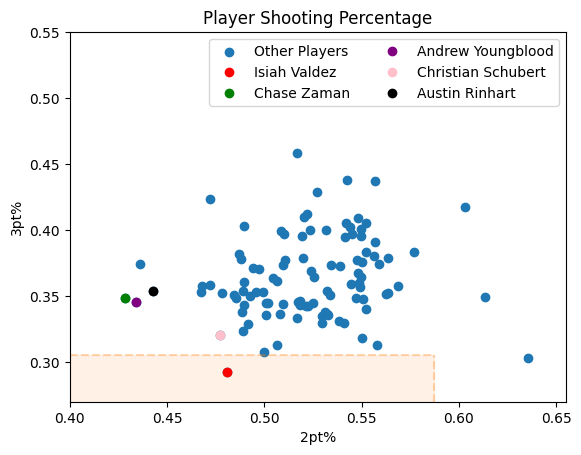

In [121]:
# Set the figure size in inches
#plt.figure(figsize=(10,6))

x_val = df[['2pt%']] #.5870
y_val = df[['3pt%']] #.3051
#color_list = np.concatenate([
#    [np.full((len(df), 1), 0.23)], 
#    [np.full((len(df), 1), 0.684)], 
#    [np.full((len(df), 1), 0.848)], 
#    [np.subtract(np.ones((len(df), 1)), df[['Iso']])]
#    ]).transpose()
#print(np.shape(color_list))

plt.scatter(x_val, y_val, label = "Other Players" )

x = np.array([.4, .5870])
y1 = np.array([0.3051, 0.3051])
y2 = np.array([0.27, 0.27])

plt.plot(x, y1, '--', color='C1', alpha=0.3)
plt.plot([.5870, .5870], [.27, .3051], '--', color='C1', alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 > y2), color='C1', alpha=0.1)

plt.plot(.481, .2928, 'ro', label="Isiah Valdez")
plt.plot(.428571, .3483, 'go', label="Chase Zaman")
plt.plot(.434, .3453, 'o', color="purple", label="Andrew Youngblood")
plt.plot(.4772, .3204, 'o', color="pink", label="Christian Schubert")
plt.plot(.4429, .3541, 'o', color="black", label="Austin Rinhart")


plt.xlim([0.4, 0.655])
plt.ylim([0.27, .55])

# Set x and y axes labels
plt.xlabel('2pt%')
plt.ylabel('3pt%')

plt.title('Player Shooting Percentage')
plt.legend(ncols=2)
plt.show()

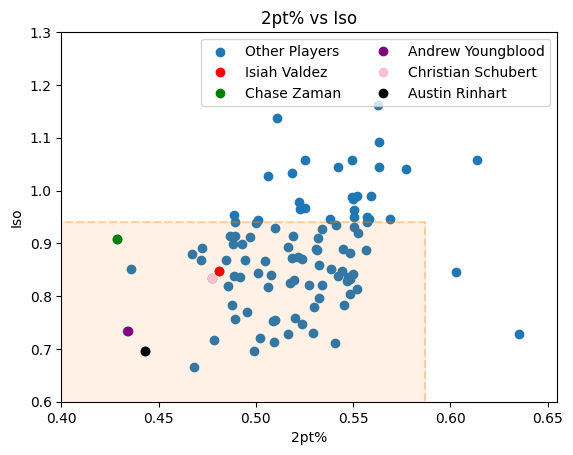

In [117]:
# Set the figure size in inches
#plt.figure(figsize=(10,6))

x_val = df[['2pt%']] #.5870
y_val = df[['Iso']] #.3051

plt.scatter(x_val, y_val, label = "Other Players" )

x = np.array([.2, .5870])
y1 = np.array([0.94, 0.94])
y2 = np.array([0.27, 0.27])

plt.plot(.4810, .847,  'ro', label="Isiah Valdez")
plt.plot(.4286, .908103, 'go', label="Chase Zaman")
plt.plot(.434, .734574,  'o', color="purple", label="Andrew Youngblood")
plt.plot(.4772, .83499, 'o', color="pink", label="Christian Schubert")
plt.plot(.443, .69604, 'o', color="black", label="Austin Rinhart")

plt.plot(x, y1, '--', color='C1', alpha=0.3)
plt.plot([.5870, .5870], [.2, .94], '--', color='C1', alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 > y2), color='C1', alpha=0.1)

plt.xlim([0.4, 0.655])
plt.ylim([0.6, 1.3])

# Set x and y axes labels
plt.xlabel('2pt%')
plt.ylabel('Iso')

plt.title('2pt% vs Iso')
plt.legend(ncols=2)
plt.show()